In [ ]:
%pip install -U albumentations

In [74]:
import albumentations as A
import cv2
import torch
from torchvision import transforms
from torchvision.transforms import *
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# 원본 이미지

In [31]:
img_list = ['/opt/ml/input/data/train/images/000517_female_Asian_58/mask5.jpg',
'/opt/ml/input/data/train/images/004399_female_Asian_59/mask3.jpg',
'/opt/ml/input/data/train/images/004384_female_Asian_60/mask3.jpg',
'/opt/ml/input/data/train/images/004280_male_Asian_60/normal.jpg']

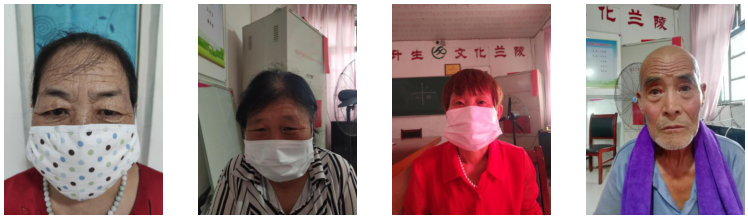

In [75]:
fig, ax = plt.subplots(1, 4, figsize=(24, 7),dpi=40)
for i, img in enumerate(img_list):
    plt.subplot(1,4,i+1)
    plt.axis('off')
    ax[0].set_title(img)
    Image_file = Image.open(img)
    plt.imshow(Image_file)

#### 이미지 보여주는 함수 정의

In [76]:
def img_show(img_list):
    fig, ax = plt.subplots(1, 4, figsize=(24, 7),dpi=40)
    for i, img in enumerate(img_list):
        plt.subplot(1,4,i+1)
        plt.axis('off')
        ax[0].set_title(img)
        Image_file = Image.open(img)
        image = np.array(Image_file)
        transformed = transform(image=image)['image']
        plt.imshow(transformed)
    plt.show()


##### 사용 예시

RandomCrop을 하면 얼굴이 잘리는 것을 확인할 수 있습니다.
CenterCrop을 사용해야 할 듯

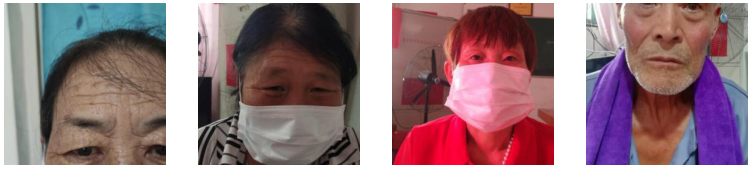

In [77]:
transform = A.Compose([
    A.RandomCrop(width=256, height=256),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
])

img_show(img_list)

##### 1. Blur
##### 초점이 안 맞는 사진을 만들고 싶다면, blur처리를 하는게 좋다고 생각합니다. 아래는 (3, 9) 사용
##### 비슷한 걸로 MotionBlur 변환도 존재합니다. 사선으로 blur처리가 되는 효과입니다.
##### MotionBlur(always_apply=False, p=1.0, blur_limit=(3, 7))

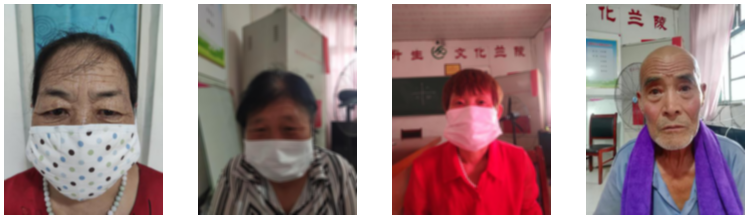

In [78]:
transform = A.Compose([
    A.Blur(always_apply=False, p=1.0, blur_limit=(3, 9))
    # p (default=0.5)
    # # blur_limit(int, (int, int)) default=(3, 7). kernel size를 의미하고 왼쪽 숫자는 최소 3이어야 합니다.
])

img_show(img_list)

##### 2. CLAHE
grid size마다 contrast 변환을 주는 듯 합니다. 굳이 사용해야할까 싶습니다.

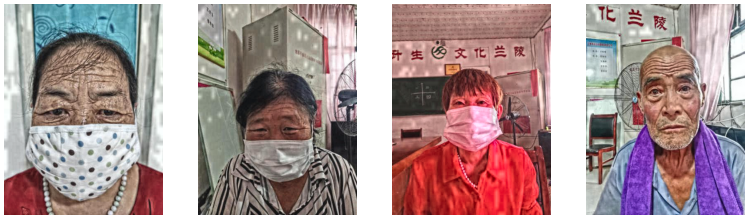

In [79]:
transform = A.Compose([
    A.CLAHE(always_apply=False, p=1.0, clip_limit=(1, 4), tile_grid_size=(50, 50))
    # clip_limit : contrast limit 값
    # tilt_grid_size : 
])

img_show(img_list)

## 3. Crop 계열
#### center crop
#### crop
#### RandomCrop
#### RandomResizedCrop

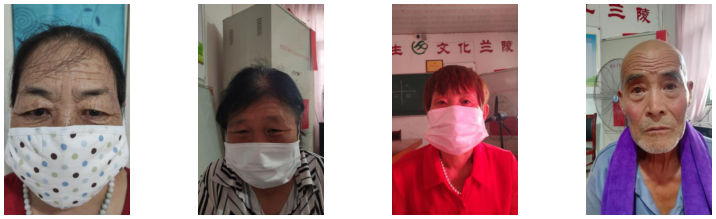

In [101]:
transform = A.Compose([
    A.CenterCrop(always_apply=False, p=1.0, height=470, width=280)
    # 가운데 기준으로 height * width 크기로 잘라냄
    # 최소한 턱까지 나오려면 470*280 size로는 잘라내길 권장 (**물론 그 이상의 크기가 되어야 할 수도 있음)
])

img_show(img_list)

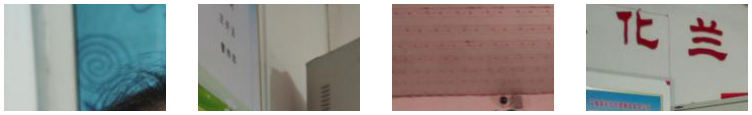

In [81]:
transform = A.Compose([
    A.Crop(always_apply=False, p=1.0, x_min=0, y_min=0, x_max=160, y_max=106)
    # xmin~xmax, ymin~ymax size crop
    # 영역을 지정해서 잘라낼 수도 있습니다.
    # 얼굴의 bounding box를 찾아낼 수 있을 때 사용 가능해보입니다.
])

img_show(img_list)

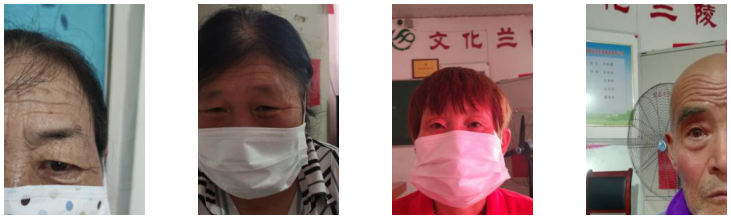

In [82]:
transform = A.Compose([
    A.RandomCrop(always_apply=False, p=1.0, width=200, height=300)
    # width * height size random crop
    # 비추천
])

img_show(img_list)

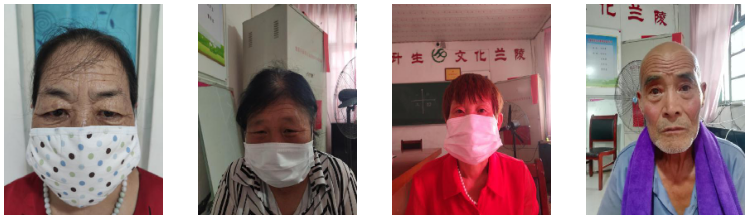

In [83]:
transform = A.Compose([
    A.RandomResizedCrop(always_apply=True, p=1.0, height=256, width=192, scale=(0.85, 1), ratio=(0.8, 2), interpolation=0)
    # 작동 방식의 이해 : ratio에 해당하는 만큼 사진을 조정하고 scale에 해당하는 만큼의 면적을 잘라냄. 그리고 height * width size 로 resize
    # 차라리 같은 기능을 하는 여러 변환을 통해 만드는 게 직관적이고 쉬울 듯.
    # resize=>crop=>resize
    
    # height & width size
    # scale
    # ratio = 클 수록 위로 길어진 사진
    # interpolation 보간법 종류 설정: cv2.INTER_NEAREST, cv2.INTER_LINEAR(default), cv2.INTER_CUBIC, cv2.INTER_AREA, cv2.INTER_LANCZOS4.

    # 예를 들어 height=512, width=384, scale=(0.6, 0.8), ratio=(2, 3)
    # 사진을 세로로 2~3배로 늘리고, 그 사진 면적중 60~80%를 잘라 512*384 로 resize.
    # ratio=(0.8, 1.8), scale=(0.85, 1) 
])

img_show(img_list)

### Channel Shuffle
##### 의미있는 변환인지는 모르겠습니다.

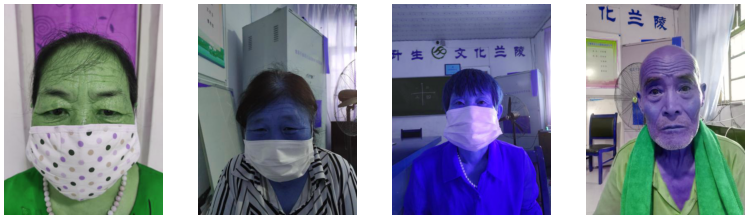

In [84]:
transform = A.Compose([
    A.ChannelShuffle(always_apply=False, p=1.0)
    # 채널 셔플
])

img_show(img_list)

## Coarse Dropout

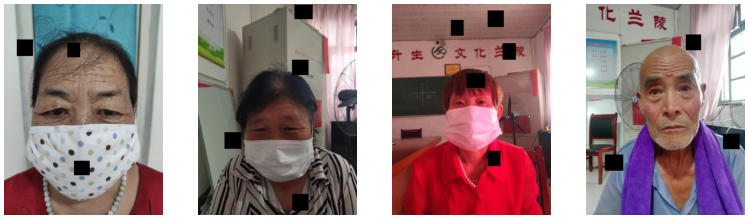

In [85]:
transform = A.Compose([
    A.CoarseDropout(always_apply=False, p=1.0, max_holes=5, max_height=40, max_width=45, min_holes=3, min_height=35, min_width=30)
    # min_holes, max_holes : zero out 될 영역의 개수 설정
    # max_height, min_height, max_width, min_width : zero out 될 영역의 크기 설정
])

img_show(img_list)

## Cutout
#### CoarseDropout과 다르게 fill_value를 통해 색을 채워 넣을 수 있음

/opt/conda/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:689: FutureWarning: This class has been deprecated. Please use CoarseDropout
  warnings.warn(


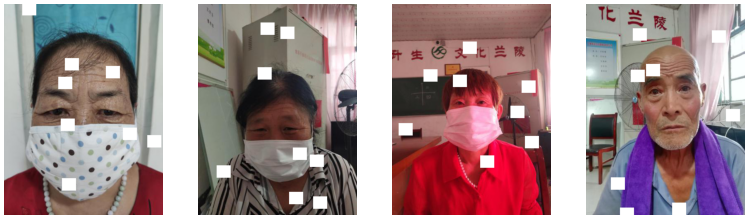

In [86]:
transform = A.Compose([
    A.Cutout(always_apply=False, p=1.0, num_holes=8, max_h_size=30, max_w_size=34, fill_value=([255,255,255]))
    # num_holes : drop out 될 영역의 개수 설정
    # max_h_size, max_w_size : zero out 될 영역의 크기 설정
    # fill_value : 넣을 색
])
    
img_show(img_list)

## RandomFog

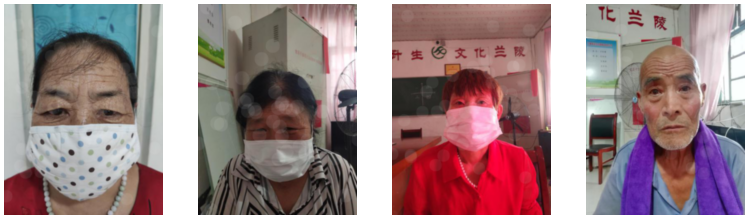

In [87]:
transform = A.Compose([
    A.RandomFog(always_apply=False, p=1.0, fog_coef_lower=0.23, fog_coef_upper=0.28, alpha_coef=0.3)
    # 순한 맛 노이즈?
    # fog_coef : 안개 효과 정도. 얼마나 흐릿해지는가 [0, 1] 범위
    # alpha_coef : fog circle의 투명도 [0, 1] 범위
])
    
img_show(img_list)

## DownScale

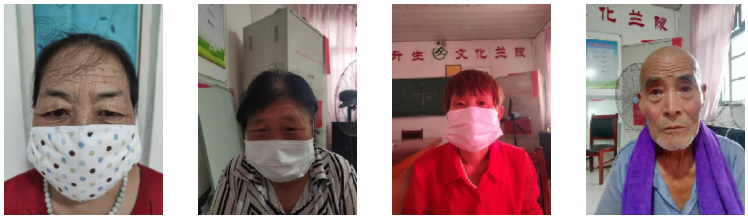

In [88]:
transform = A.Compose([
    A.Downscale(always_apply=False, p=1.0, scale_min=0.3, scale_max=0.6, interpolation=0)
    # scale_min(<1) : image scale 최소값(작을 수록 모자이크 효과가 커짐, 0.4 이상 권장)
    # scale_max : 최대값(1에 가까울 수록 원본에 가까워짐)
])

img_show(img_list)

## Flip

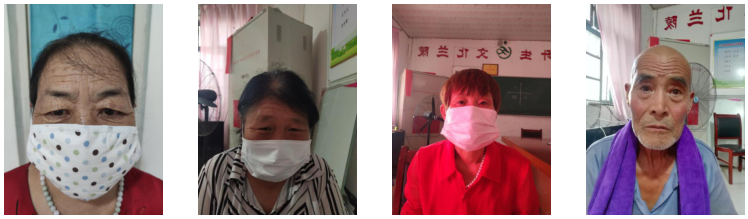

In [89]:
transform = A.Compose([
    A.HorizontalFlip(always_apply=False, p=1.0)
    # 수평/수직/수평수직 뒤집기
])

img_show(img_list)

## GaussNoise

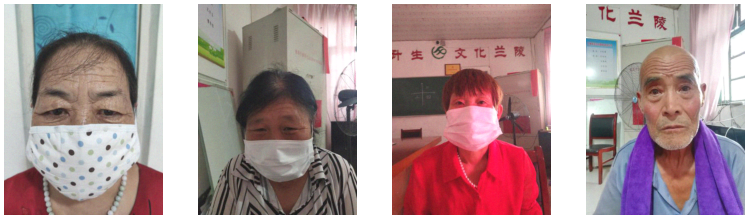

In [95]:
transform = A.Compose([
    A.GaussNoise(always_apply=False, p=1.0, var_limit=(30.0, 50.0), mean=20)
    # var_limit(default (10.0, 50.0)) : variance of noise 범위(~500)
    # mean(default 0) : mean of noise(-100 ~ 100)
])

img_show(img_list)

## GridDistortion

#### 적당한 왜곡을 주는 건 괜찮을 것 같습니다.
#### 굳이 수치를 바꿀 필요는 없어보입니다.

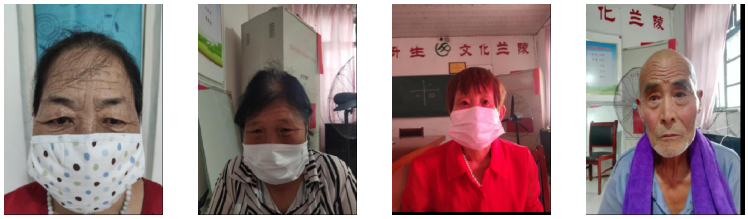

In [91]:
transform = A.Compose([
    A.GridDistortion(always_apply=False, p=1.0, num_steps=15, distort_limit=(-0.25, 0.25), 
    interpolation=0, border_mode=0, value=(0, 0, 0), mask_value=None)
])

img_show(img_list)

## ISO noise
#### 카메라 찍을 때 노이즈를 구현하는 변환

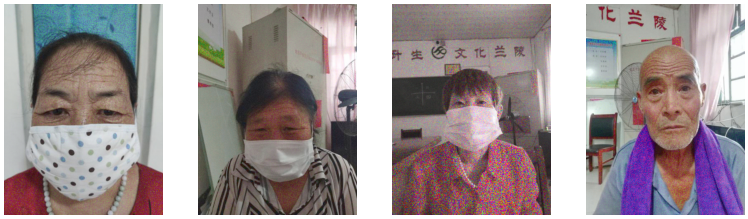

In [93]:
transform = A.Compose([
    A.ISONoise(always_apply=False, p=1.0, intensity=(0.2, 0.6), color_shift=(0.0,1.0))
    # color_shift (float, float): variance range for color hue change. # 값이 작을 수록 원색에 가깝고 1에 가까워 질수록 흑백
    # intensity ((float, float): Multiplicative factor that control strength of color and luminace noise # 노이즈 정도 조절
])

img_show(img_list)

## randomly HSV 변환
#### 비슷하게 RGB shift하는 변환도 존재합니다.
##### RGBShift(always_apply=False, p=1.0, r_shift_limit=(-20, 20), g_shift_limit=(-20, 20), b_shift_limit=(-20, 20))
#### 밝기와 대비 조절 변환도 존재
##### RandomBrightnessContrast(always_apply=False, p=1.0, brightness_limit=(-0.2, 0.2), contrast_limit=(-0.2, 0.2), brightness_by_max=True)

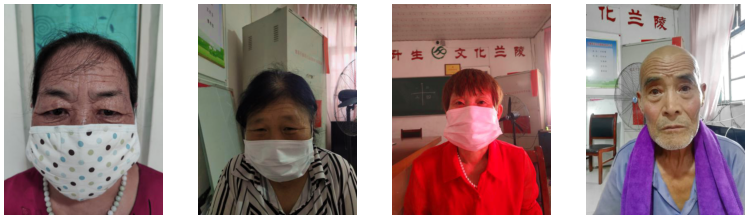

In [92]:
transform = A.Compose([
    A.HueSaturationValue(always_apply=False, p=1.0, hue_shift_limit=(-15, 15), sat_shift_limit=(-20, 20), val_shift_limit=(-20, 20))
    # hue 색상
    # saturation 채도
    # value 명도
])

img_show(img_list)

## Invert Image
#### 색 반전

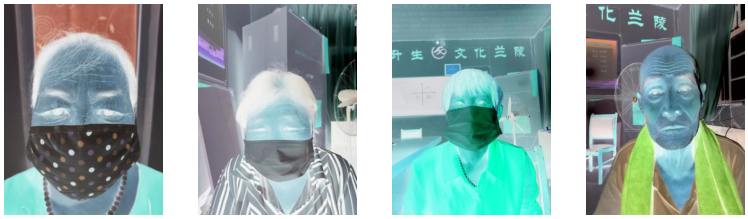

In [94]:
transform = A.Compose([
    A.InvertImg(always_apply=False, p=1.0)
])

img_show(img_list)

## 기타 
##### ToGray(always_apply=False, p=1.0)
##### Resize(always_apply=True, p=1.0, height=106, width=160, interpolation=0)